Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

# Задачи

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.


Описание данных

1. timestamp – дата и время (точность до часа)
2. cnt – количество аренд велосипедов за этот час
3. t1 – температура, в С
4. t2 – температура "ощущается как", в С 
5. hum – влажность (%)
6. wind_speed – скорость ветра, км/ч
7. weather_code – погодные условия:
        1 – ясно (SKC)
        2 – преимущественно ясно / встречаются отдельные облака (SCT)
        3 – облачно / значительные облака (BKN)
        4 – пасмурно (OVC)
        7 – небольшой дождь Rain/ light Rain shower/ Light rain 
        10 – дождь с грозой
        26 – снегопад 
        94 – ледяной туман (да, такое бывает!)
8. isholiday – является ли день праздником (1 – праздник, 0 – нет)
9. isweekend –  является ли день выходным (1 – выходной, 0 – нет)
10. season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

# Задача 1

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [25]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv('london.csv') # прочитали файл
df = df.astype({'timestamp': 'datetime64'}) #преобразовали формат времени

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [28]:
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Задача 2

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)

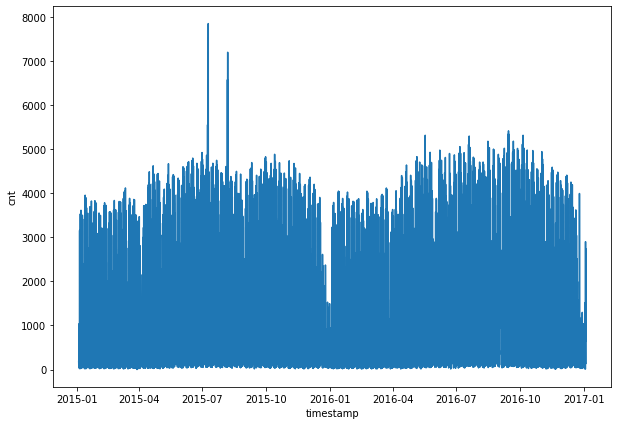

In [29]:
plt.figure(figsize=(10,7)) #задали размеры графика
#построили лайплот, где отражена сумма поездок по датам
sns.lineplot(data=df.groupby('timestamp', as_index=False).agg({'cnt':'sum'}), x="timestamp", y="cnt")

# Задача 3

Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [30]:
 #посчитали количество аренд по дням, отсортировали по возрастанию
df_cnt = df.sort_values('timestamp', ascending=True).set_index('timestamp').resample(rule='D').cnt.sum().reset_index()
df_cnt.head(5)

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


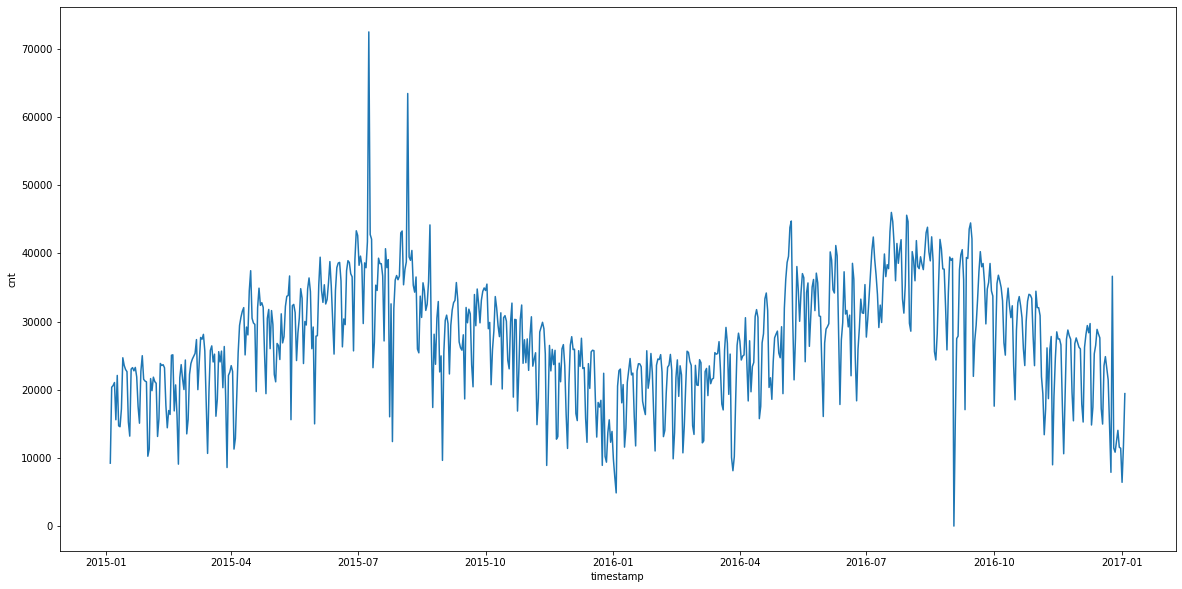

In [31]:
plt.figure(figsize=(20,10)) #задали размеры графика
sns.lineplot(data=df_cnt, x="timestamp", y="cnt") #построили лайплот

# Задача 4

Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [32]:
# посчитали скользящие средние для количества аренд по дням с окном 3
df_cnt['rolling_mean_3'] = df_cnt.rolling(3).mean()

In [33]:
df_cnt.query('timestamp	 == "2015-07-09"') # отфильтровали значение средней скользящей за 2015-07-09

,timestamp,cnt,rolling_mean_3
186,2015-07-09,72504,50705.0


# Задача 5

Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [34]:
# посчитали разницу между наблюдаемыми и подсчитанными значениями
df_cnt['delta_mean'] = df_cnt.cnt - df_cnt.rolling_mean_3
df_cnt.head()

,timestamp,cnt,rolling_mean_3,delta_mean
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667


In [35]:
# применили функцию для подсчета стандартного отклонения
std = np.std(df_cnt.delta_mean)

In [36]:
std.round(2)

4558.59

# Задача 6

Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [37]:
#определим границы интервалов
df_cnt['upper_bound'] = df_cnt.rolling_mean_3 + 2.576 * std
df_cnt['lower_bound'] = df_cnt.rolling_mean_3 - 2.576 * std

# Задача 7-8

Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [38]:
#вывели все дни, по которым было превышение интервала
df_cnt.query('cnt > upper_bound or cnt < lower_bound').sort_values('cnt')

,timestamp,cnt,rolling_mean_3,delta_mean,upper_bound,lower_bound
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812


In [39]:
# высокое число аренд связано с Забастовками в метро 2015-07-09
# низкое число аренд связано скорее всего с ошибкамипри сборе данных 2016-09-02